In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

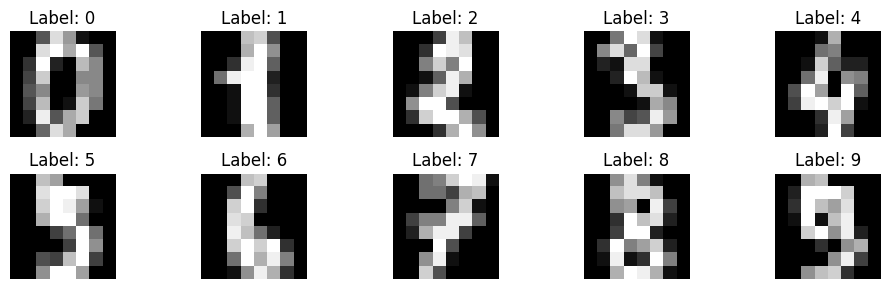

In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

digits = load_digits()
X, y = digits.data, digits.target

plt.figure(figsize=(10, 3))
for i in range(10): 
    plt.subplot(2, 5, i + 1) 
    plt.imshow(digits.images[i], cmap='gray') 
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [11]:
data_new=pd.DataFrame(X,columns=digits.feature_names)
data_new.shape

(1797, 64)

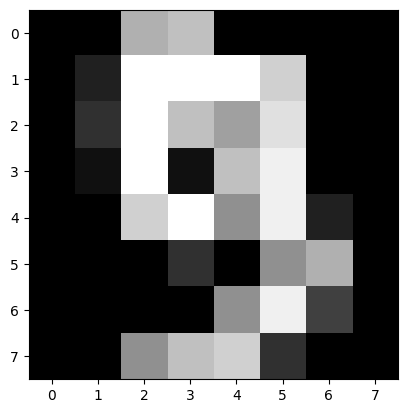

In [12]:
plt.imshow(data_new.loc[9].values.reshape(8,8),cmap='gray')

In [8]:
data_new.sample(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
941,0.0,0.0,6.0,14.0,11.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,14.0,15.0,4.0,0.0,0.0
787,0.0,0.0,4.0,12.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15.0,16.0,11.0,0.0,0.0
519,0.0,0.0,1.0,9.0,15.0,5.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,0.0,1.0,10.0,16.0,15.0,11.0,1.0
619,0.0,0.0,2.0,9.0,13.0,8.0,0.0,0.0,0.0,1.0,...,11.0,0.0,0.0,0.0,3.0,10.0,14.0,15.0,5.0,0.0
461,0.0,0.0,10.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,0.0,8.0,14.0,8.0,11.0,14.0,1.0
1142,0.0,0.0,5.0,16.0,15.0,3.0,0.0,0.0,0.0,0.0,...,13.0,3.0,0.0,0.0,5.0,2.0,9.0,16.0,14.0,3.0
585,0.0,0.0,1.0,8.0,14.0,15.0,5.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,8.0,16.0,7.0,0.0,0.0
137,0.0,0.0,2.0,15.0,15.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,12.0,1.0,0.0,0.0,0.0
1661,0.0,0.0,0.0,11.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,7.0,0.0,0.0,0.0
581,0.0,0.0,0.0,10.0,16.0,6.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,8.0,16.0,15.0,1.0,0.0


In [14]:
data_new['target']=digits.target
data_new.shape

(1797, 65)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    data_new.drop(columns=['target']), 
    data_new['target'], 
    test_size=0.3, 
    random_state=10
)

log_model = LogisticRegression(max_iter=10000, multi_class='multinomial')
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9648148148148148

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       0.93      0.96      0.95        57
           2       0.95      1.00      0.97        55
           3       0.96      0.96      0.96        56
           4       0.98      0.94      0.96        51
           5       0.96      0.96      0.96        51
           6       0.98      0.98      0.98        55
           7       0.98      0.97      0.97        60
           8       0.92      0.92      0.92        50
           9       1.00      0.94      0.97        54

    accuracy                           0.96       540
   macro avg       0.97      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540



Confusion Matrix:
[[51  0  0  0  0  0  0  0  0  0]
 [ 0 55  1  0  0  0  0  0  1  0]
 [ 0  0 55  0  0  0  0  0  0  0]
 [ 0  0  1 54  0  1  0  0  0  0]
 [ 0  2  0  0 48  0  0  0  1  0]
 [ 0  1  0  0  0 49  0  1  0  0]
 [ 0  1  0  0  0  0 54  0  0  0]
 [ 0  0  0  1  1  0  0 58  0  0]
 [ 1  0  1  1  0  0  1  0 46  0]
 [ 0  0  0  0  0  1  0  0  2 51]]


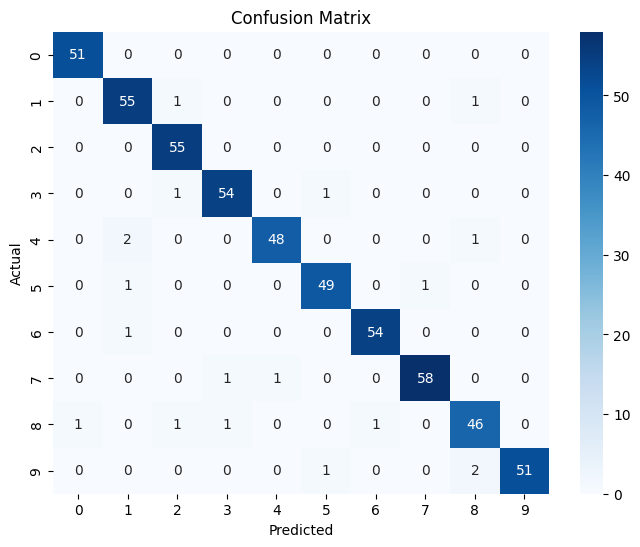

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=digits.target_names, 
            yticklabels=digits.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


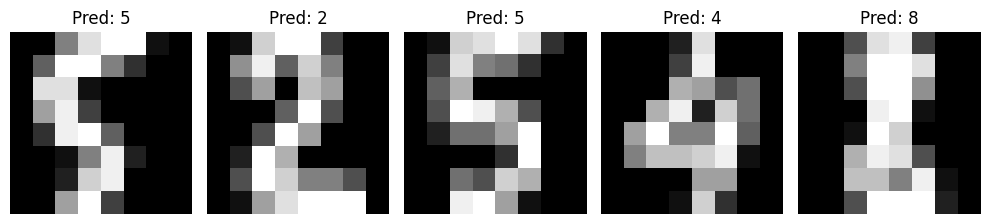

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))

for j, i in enumerate(X_test.index[:5]):
    img = X_test.loc[i].values.reshape(8, 8)  # Reshape to 8x8
    plt.subplot(1, 5, j + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {y_pred[j]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/kaggle/input/house-csv/houses.csv')
df

,property_name,link,society,price,rate,area,areaWithType,bedRoom,bathroom,balcony,...,address,noOfFloor,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
0,5 Bedroom House for sale in Sector 70A Gurgaon,https://www.99acres.com/5-bhk-bedroom-independ...,Bptp Visionnaire,5.25 Crore,"₹ 20,115/sq.ft.",(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5 Bedrooms,4 Bathrooms,3+ Balconies,...,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3 Floors,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5...",K70037724
1,5 Bedroom House for sale in Sector 21A Faridabad,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,5.7 Crore,"₹ 105,751/sq.ft.",(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5 Bedrooms,4 Bathrooms,2 Balconies,...,"Sector 21A Faridabad, Gurgaon, Haryana",2 Floors,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN,E69288322
2,10 Bedroom House for sale in Sushant Lok Phase 1,https://www.99acres.com/10-bhk-bedroom-indepen...,NaN,2.1 Crore,"₹ 38,251/sq.ft.",(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10 Bedrooms,10 Bathrooms,3+ Balconies,...,"Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5...",F69536898
3,21 Bedroom House for sale in Sector 54 Gurgaon,https://www.99acres.com/21-bhk-bedroom-indepen...,NaN,5 Crore,"₹ 43,066/sq.ft.",(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21 Bedrooms,21 Bathrooms,3+ Balconies,...,"Sector 54 Gurgaon, Gurgaon, Haryana",5 Floors,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5...",R69483164
4,12 Bedroom House for sale in Sushant Lok Phase 1,https://www.99acres.com/12-bhk-bedroom-indepen...,NaN,3 Crore,"₹ 53,763/sq.ft.",(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12 Bedrooms,12 Bathrooms,3+ Balconies,...,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5...",M69381272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,4 Bedroom House for sale in Sector 26 Gurgaon,https://www.99acres.com/4-bhk-bedroom-independ...,DLF City Phase 1,5.5 Crore,"₹ 30,556/sq.ft.",(167 sq.m.) Plot Area,Plot area 200(167.23 sq.m.),4 Bedrooms,4 Bathrooms,3 Balconies,...,"Sector 26 Gurgaon, Gurgaon, Haryana",2 Floors,North-East,5 to 10 Year Old,"['Dlf phase 1 metro station', 'Sikandarpur met...","Residential house, g block, dlf phase-1, gurga...","['10 Light', 'No AC', 'No Bed', 'No Chimney', ...","['Feng Shui / Vaastu Compliant', 'High Ceiling...",NaN,Q70281606
1040,3 Bedroom House for sale in DLF Phase 2,https://www.99acres.com/3-bhk-bedroom-independ...,DLF City Plots Phase 2,4.25 Crore,"₹ 31,481/sq.ft.",(125 sq.m.) Plot Area,Plot area 150(125.42 sq.m.),3 Bedrooms,2 Bathrooms,3 Balconies,...,"DLF Phase 2, Gurgaon, Haryana",2 Floors,North,10+ Year Old,"['Sahara Mall', 'Delhi Public School', 'Privat...","Residential house, k block, dlf phase-2, gurga...",NaN,"['High Ceiling Height', 'Maintenance Staff', '.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_name    1044 non-null   object
 1   link             1044 non-null   object
 2   society          453 non-null    object
 3   price            968 non-null    object
 4   rate             1005 non-null   object
 5   area             1044 non-null   object
 6   areaWithType     987 non-null    object
 7   bedRoom          987 non-null    object
 8   bathroom         987 non-null    object
 9   balcony          987 non-null    object
 10  additionalRoom   589 non-null    object
 11  address          1031 non-null   object
 12  noOfFloor        967 non-null    object
 13  facing           674 non-null    object
 14  agePossession    987 non-null    object
 15  nearbyLocations  913 non-null    object
 16  description      1036 non-null   object
 17  furnishDetails   743 non-null    

In [24]:
df.shape

(1044, 21)

In [25]:
df.head()

,property_name,link,society,price,rate,area,areaWithType,bedRoom,bathroom,balcony,...,address,noOfFloor,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
0,5 Bedroom House for sale in Sector 70A Gurgaon,https://www.99acres.com/5-bhk-bedroom-independ...,Bptp Visionnaire,5.25 Crore,"₹ 20,115/sq.ft.",(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5 Bedrooms,4 Bathrooms,3+ Balconies,...,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3 Floors,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5...",K70037724
1,5 Bedroom House for sale in Sector 21A Faridabad,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,5.7 Crore,"₹ 105,751/sq.ft.",(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5 Bedrooms,4 Bathrooms,2 Balconies,...,"Sector 21A Faridabad, Gurgaon, Haryana",2 Floors,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN,E69288322
2,10 Bedroom House for sale in Sushant Lok Phase 1,https://www.99acres.com/10-bhk-bedroom-indepen...,NaN,2.1 Crore,"₹ 38,251/sq.ft.",(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10 Bedrooms,10 Bathrooms,3+ Balconies,...,"Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5...",F69536898
3,21 Bedroom House for sale in Sector 54 Gurgaon,https://www.99acres.com/21-bhk-bedroom-indepen...,NaN,5 Crore,"₹ 43,066/sq.ft.",(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21 Bedrooms,21 Bathrooms,3+ Balconies,...,"Sector 54 Gurgaon, Gurgaon, Haryana",5 Floors,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5...",R69483164
4,12 Bedroom House for sale in Sushant Lok Phase 1,https://www.99acres.com/12-bhk-bedroom-indepen...,NaN,3 Crore,"₹ 53,763/sq.ft.",(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12 Bedrooms,12 Bathrooms,3+ Balconies,...,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5 Floors,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5...",M69381272


In [26]:
df.isnull().sum()

property_name        0
link                 0
society            591
price               76
rate                39
area                 0
areaWithType        57
bedRoom             57
bathroom            57
balcony             57
additionalRoom     455
address             13
noOfFloor           77
facing             370
agePossession       57
nearbyLocations    131
description          8
furnishDetails     301
features           370
rating             137
property_id          8
dtype: int64

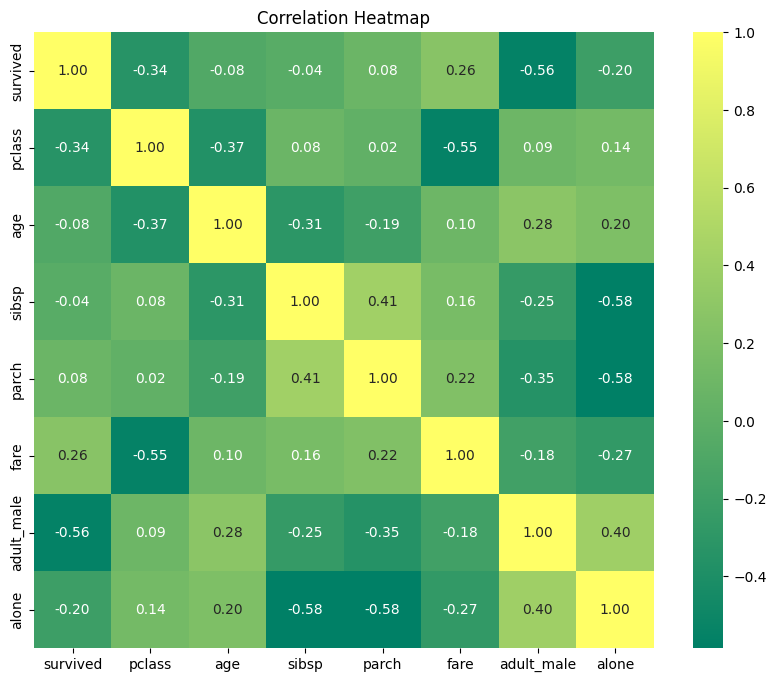

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset("titanic") 
mt = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(mt, fmt='.2f', cmap='summer', annot=True)
plt.title("Correlation Heatmap")
plt.show()


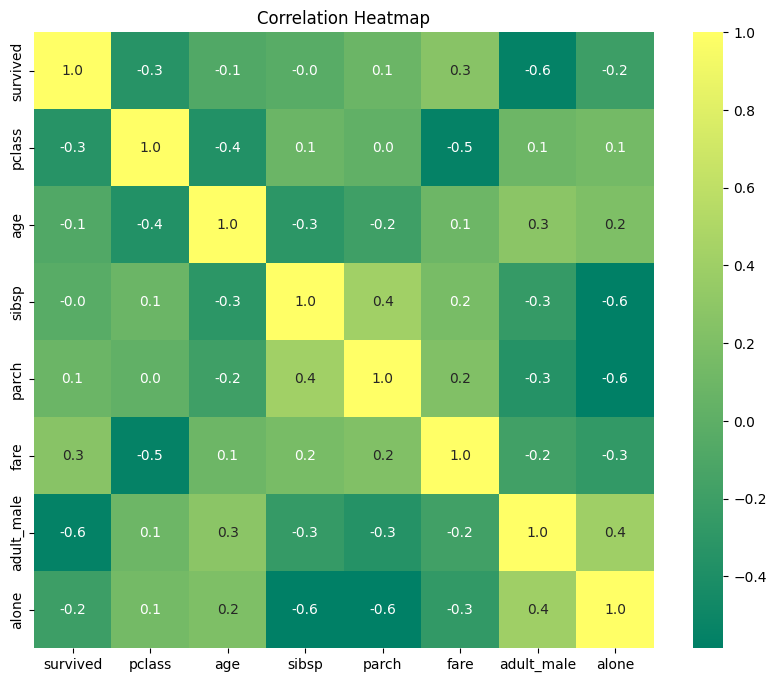

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset("titanic")
mt = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8)) 
sns.heatmap(mt, annot=True, fmt='.1f', cmap='summer')

plt.title("Correlation Heatmap")
plt.show() 
